<div style="border:solid green 2px; padding: 20px">
<h2> Комментарий ревьюера </h2>
    
Привет :) Меня зовут Макеева Таня, и я буду делать ревью твоей работы. Предлагаю общаться на "ты", надеюсь, ты не против :)

Мои комментарии ты сможешь найти по заголовку "комментарий ревьюера", а ещё они отмечены тремя цветами:   
 
<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>
    
Красным цветом выделены более критические моменты, которые обязательно нужно исправить.
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Жёлтым цветом выделены некоторые недочёты, которые тоже стоит улучшить. Если они совсем незначительные и их немного, работа может быть принята.
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
И зелёным цветом выделены советы на будущее, а также места, которые получились у тебя лучше всего.
    
</div>


Давай вести диалог через комментарии. Задавай вопросы, если такие будут, а также пиши об изменениях в ответ на мои комментарии. Пожалуйста, оставляй свои сообщения заметным цветом, отличным от моих, чтобы я ничего не упустила. 

<div class="alert alert-info">
<h2> Комментарий студента </h2>
    
Например, ты можешь оставлять свои сообщения так.
    
</div>

И не удаляй комментарии, чтобы вся история общения была перед глазами :)

<div class="alert alert-info">
Привет) Спасибо за ревью
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Рада была проверить твою работу :)
    
Мои комментарии по второй версии будут с отметкой v2
</div>

# Рекомендация тарифов

## Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Содержание
* [1. Откройте и изучите файл](#open_file)
* [2. Разбейте данные на выборки](#split_data)
* [3. Исследуйте модели](#analyse_models)
  * [Дерево решений](#analyse_models.decision_tree)
  * [Случайный лес](#analyse_models.random_forest)
  * [Логистическая регрессия](#analyse_models.logistic_regression)
* [4. Проверьте модель на тестовой выборке](#test_models)
* [5. Проверьте модели на адекватность](#models_adequacy)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from collections import namedtuple 

RANDOM_STATE = 12345

def analyze_df(df):
    rows_count, columns_count = df.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(df.head(10))
    display(df.describe())
    df.info()

def rows_ratio_for_dfs(first_df, second_df):
    return first_df.shape[0] / second_df.shape[0]

PredictionData = namedtuple('PredictionData', ('features_train', 'target_train', 'features_valid', 'target_valid'))

class ScorePredictorFactory(object):
    class ScorePredictor(object):
        def __init__(self, prediction_data, model_class):
            self._prediction_data = prediction_data
            self._model_class = model_class
            self._score = 0
            self._params = {}

        def predict_score(self, **params):
            model = self._model_class(random_state=RANDOM_STATE, **params)
            model.fit(self._prediction_data.features_train, self._prediction_data.target_train)
            predictions_valid = model.predict(self._prediction_data.features_valid)
            score = accuracy_score(self._prediction_data.target_valid, predictions_valid)  
            
            if score > self._score: 
                self._score = score
                self._params = params
            
            return score
        
        @property
        def score(self):
            return self._score
    
        @property
        def params(self):
            return self._params
    
        def __str__(self):
            return 'Лучшее значение кол-ва правильных ответов: {:.2%} при параметрах {}'.format(self.score, self.params)
    
    def __init__(self, features_train, target_train, features_valid, target_valid):
        self._prediction_data = PredictionData(features_train, target_train, features_valid, target_valid)
        
    def new_predictor(self, model_class):
        return self.ScorePredictor(self._prediction_data, model_class)

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Отличное оформление кода! Я так понимаю, до практикума у тебя был опыт в программировании? :)
   
Как доп информация: ты сипользуешь accuracy_score() для расчёта точности модели, а ещё можно получить эту же метрику через model.score().
    
</div>

<a name="open_file"></a>
## 1. Откройте и изучите файл

**Описание данных**:
- *сalls* — количество звонков
- *minutes* — суммарная длительность звонков в минутах
- *messages* — количество sms-сообщений
- *mb_used* — израсходованный интернет-трафик в Мб
- *is_ultra* — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

In [2]:
users_df = pd.read_csv('/datasets/users_behavior.csv')
analyze_df(users_df)

Количество стобцов: 5
Количество строк: 3214


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Выводы**:
* Пропусков в данных нет 
* Строки названы верно 
* Тип `calls` можно поменять на `int` потому что этот столбец означает количество звонков
* Тип `is_ultra` можно поменять на `bool`
* Целевой признак - `is_ultra`, этот признак является категоральным 

In [3]:
users_df['calls'] = users_df['calls'].astype('int')
users_df['is_ultra'] = users_df['is_ultra'].astype('bool')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null int64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null bool
dtypes: bool(1), float64(3), int64(1)
memory usage: 103.7 KB


<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Давай уточним. calls - это не количество звонков, а суммарное количество минут. С этим учётом твой выбор изменения типа данных остаётся прежним? Приведи аргументы в ползу своего решения :)
    
</div>

<div class="alert alert-info">
Если посмотреть на <b>описание данных</b>, то там написано, что <i>сalls</i> — количество звонков, а <i>minutes</i> — суммарная длительность звонков в минутах. Это правда, что к <i>int</i> можно приводить только количество звонков, потому что нецелого количества звонков не бывает. Но в нашем датасете для этого параметра вроде используется <i>calls</i> .
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Прошу прощения, перепутала столбцы. Ты всё сделал верно!
    
[Грустный ревьюер медленно катится под стол от неуместного комментария]
</div>

<a name="split_data"></a>
## 2. Разбейте данные на выборки

Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1

In [4]:
users_train_df, users_valid_df = train_test_split(users_df, test_size=0.4, random_state=RANDOM_STATE)
users_valid_df, users_test_df = train_test_split(users_valid_df, test_size=0.5, random_state=RANDOM_STATE)

Проверим, что разбили данные в правильном соотношении

In [5]:
print('{:.2%}'.format(rows_ratio_for_dfs(users_train_df, users_df)))
print('{:.2%}'.format(rows_ratio_for_dfs(users_valid_df, users_df)))
print('{:.2%}'.format(rows_ratio_for_dfs(users_test_df, users_df)))

59.99%
20.01%
20.01%


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Выборки сформированы верно. Классно, что использовал функцию train_test_split для этого. Отлично :)
    
</div>

<a name="analyse_models"></a>
## 3. Исследуйте модели

Выделим фичи и целевой показатель `is_ultra` для обучающей и валидационной выборки

In [6]:
features_train = users_train_df.drop(['is_ultra'], axis=1)
target_train = users_train_df['is_ultra']

features_valid = users_valid_df.drop(['is_ultra'], axis=1)
target_valid = users_valid_df['is_ultra']

users_score_predictor_factory = ScorePredictorFactory(features_train, target_train, features_valid, target_valid)

<a name="analyse_models.decision_tree"></a>
### Дерево решений 

Будем перебирать гиперпараметр `max_depth`, который обозначает глубину решающего дерева 

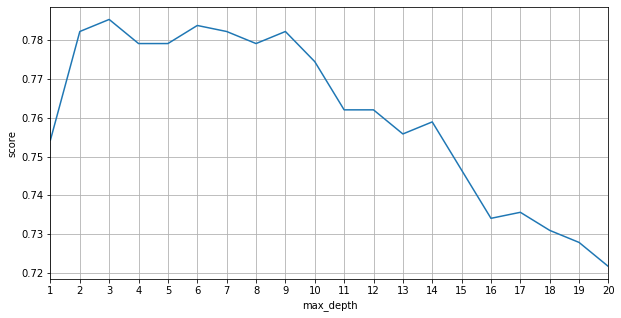

Лучшее значение кол-ва правильных ответов: 78.54% при параметрах {'max_depth': 3}


In [7]:
decision_tree_predictor = users_score_predictor_factory.new_predictor(DecisionTreeClassifier)
decision_tree_data = []

for max_depth in range(1, 21, 1):
    score = decision_tree_predictor.predict_score(max_depth=max_depth)
    decision_tree_data.append((max_depth, score))

pd.DataFrame(decision_tree_data).plot(x=0, y=1, grid=True, legend=False, xticks=range(1, 21), figsize=(10, 5)).set(xlabel='max_depth', ylabel = 'score')
plt.show()
print(decision_tree_predictor)

**Вывод**: Наилучшее значение количества правильных ответов наблюдаем при значении `max_depth` = 3, после `max_depth` = 9 наблюдается переобучение.

<div class="alert alert-warning">
<h2> Комментарий ревьюера v2</h2>
    
Стоит добавить заголовок к графику и уточнить, на какой выборке считались метрики. Я так понимаю, что только на валидационной.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Вывод по графику верный, но что бы быть в нём на 100% уверенным стоит дополнительно добавить сюда график метрики по обучающй выборке. Чтобы увидеть, что на обучающей всё просто супер, а здесь уже хуже.
</div>

<a name="analyse_models.random_forest"></a>
### Случайный лес 

Будем перебирать гиперпараметры `max_depth` и `n_estimators`, который обозначает количество деревьев для случайного леса

In [8]:
random_forest_predictor = users_score_predictor_factory.new_predictor(RandomForestClassifier)
random_forest_data = []

for max_depth in range(1, 11, 1):
    for estim in range(10, 51, 10):
        score = random_forest_predictor.predict_score(n_estimators=estim, max_depth=max_depth)
        random_forest_data.append((max_depth, estim, score))

display(pd.DataFrame(random_forest_data, columns=('max_depth', 'estim', 'score'))) 
print(random_forest_predictor)

,max_depth,estim,score
0,1,10,0.755832
1,1,20,0.766719
2,1,30,0.766719
3,1,40,0.776050
4,1,50,0.758942
5,2,10,0.777605
6,2,20,0.783826
7,2,30,0.783826
8,2,40,0.785381
9,2,50,0.783826


Лучшее значение кол-ва правильных ответов: 80.87% при параметрах {'n_estimators': 40, 'max_depth': 8}


**Вывод**: модель случайного леса показывает лучшую точность, чем дерево решений. Видно, что при `max_depth` = 1 модель еще надостаточно обучается и кол-во правильных ответов сильно ниже, чем при других значениях гиперпараметров.  

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
В данном случае в рамках рассматриваемого диапазона каких-то доп выводах о переобучении не сделать. Оно наверняка будет наблюдаться при ещё большей глубине. 
    
На будущее я бы предложила иначе визуализировать подобные результаты сразу по двум параметрам. По сути, ты можешь составить двумерную матрицу. По первой размерности - перебор параметра max_depth, по второй - n_estimators, а внутри матрицы - значения метрики. Для этого случая у тебя бы была матрица 5x5. Тогда можно использовать для визуализации метод pcolormesh из пакета matplotlib, где ты получишь изображение с количеством квадратов по размеру матрицы, а значения метрики будут различаться цветом. А для того, чтобы понимать какой цвет, что означает можно использовать colorbar().
</div>

<a name="analyse_models.logistic_regression"></a>
### Логистическая регрессия

Будем перебирать гиперпараметр `solver`, который обозначает алгоритм, используемый для решения задачи оптимизации 

In [9]:
logistic_regression_predictor = users_score_predictor_factory.new_predictor(LogisticRegression)
logistic_regression_data = []

for solver in ('newton-cg', 'lbfgs', 'liblinear'):
    score = logistic_regression_predictor.predict_score(solver=solver)
    print('solver {} : {:.2%}'.format(solver, score))
    
print(logistic_regression_predictor)

solver newton-cg : 75.58%
solver lbfgs : 71.07%
solver liblinear : 75.89%
Лучшее значение кол-ва правильных ответов: 75.89% при параметрах {'solver': 'liblinear'}


**Вывод**: модель логистической регрессии показывает худшую точность, чем дерево решений или случайный лес 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
У тебя всё сделано очень логично. Ты правильно подготовил данные дл обучения, рассмотрел три метода, сделал перебор гиперпараметров для каждого. Очень классно, молодец!
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Единственное, что я бы предложила здесь добавить - это отображение (может гарфическое, может какое-то табличное, может вывод) качества модели при переборе гиперпараметров (важно посмотреть и на обучающую, и на валидационную выборки). "Зачем это?" - вполне логично спросишь ты, ведь у нас выбрано лучшее решение, мы победили :) Но поведение метрики на обучающей выборке покажет нам насколько модели склонны переобучаться на нашем датасете. Ты сразу заметишь этот момент. Предлагаю добавить этот анализ в работу и сделать дополнительные выводы.
    
Вообще лучше прослеживать, как меняются метрики во время твоих тестов, а не слепо выбирать модель с лучшими показателями. Ты можешь увидеть аномальное поведение в процессе обучения, и это подтокнёт тебя к дополнительным рассуждениям, усовершенствованиям модели и т.п.
    
</div>

<div class="alert alert-info">
Согласен, добавил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Отлично, что ты добавил метрики на валидационной выборке, и жаль, что не добавил также на обучающей. Это было бы очень показательно продемонстрировать то, какое высокое качество получилось на обучающей, а на других данных уже нет.
</div>

<a name="test_models"></a>
## 4. Проверьте модель на тестовой выборке

Выделим фичи и целевой показатель `is_ultra` для тестовой выборки 

In [10]:
features_test = users_test_df.drop(['is_ultra'], axis=1)
target_test = users_test_df['is_ultra']

В результате проверки, мы выяснили, что алгоритм случайного леса с гиперпараметрами `n_estimators = 40` и `max_depth = 8` дает лучшее значение кол-ва правильных ответов. Проверим эту модель на тестовых данных

In [11]:
model = RandomForestClassifier(n_estimators=40, max_depth=8, random_state=RANDOM_STATE)
model.fit(features_train.append(features_valid), target_train.append(target_valid))

predictions_test = model.predict(features_test)
accuracy_score(target_test, predictions_test)

0.7993779160186625

На тестовой выборке модель показывает точность выше, чем в условии задачи (0.75)

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Валидационная выборка была использована для выбора наилучшей модели. Теперь для тестирования мы можем включить ещё в обучающую и обучить модель на общей выборке train + valid. Чем больше данных, тем лучше :)
    
P.S. Может произойти такое, что после обучения на бОльшем наборе данных ты получишь метрику качесва похуже. Давай тогда пораассуждаем, почему такое могло быть с позиции переобучения. Если метрика ухудшится, то текущие расчёты в тестировании предлагаю оставить вместе с новыми.
    
</div>

<div class="alert alert-info">
Поправил, качество улучшилось
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Отлично :)
</div>

<a name="models_adequacy"></a>
## 5. Проверьте модели на адекватность

Посмотрим, какое распределение в тестовой выборке между пользователями тарифов "Ультра" и "Смарт"

In [12]:
users_test_df[users_test_df['is_ultra'] == True].shape[0] / users_test_df.shape[0]

0.3157076205287714

Вычислим точность модели в случае рандомного распределения 

$0.68 * (\textrm{доля угаданных владельцев "Смарт"}) + 0.32 * (\textrm{доля угаданнх владельцев "Ультра"}) = 0.68 * 0.5 + 0.32 * 0.5 = 0.5$

Значение правильных ответов модели больше чем 0.5, из чего можно сделать вывод, что модель прошла sanity check

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Супер! Отлично, то ты сделал эту проверку, выше всех похвал :)
    
А если сравнить модель с константной (или с константными 0/1), что можешь сказать? Понимаешь, как сделать такую проверку?
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера - резюме</h2>
    
У тебя получилась довольно хорошая работа. Ты чётко выполнил задание, сделал перебор достаточного количества гиперпараметров сразу для трёх моделей. Отлично, молодец! Бонусное задание тоже сдалось под твоим напором, просто супер. Работа отлично оформлена, структурирована, в ней легко ориентироваться. Продолжай в том же духе :)

У меня есть три комментария, которые стоит учесть. Это не грубые ошибки, а уточнения / дополнения, но с ними работа станет лучше.

Уверена, ты справишься с ними, и буду ждать твою работу на повторное ревью :)
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 - резюме</h2>
    
Теперь все замечания учтены, и работа завершена. Успехов в следующих проектах :)
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
